# Multiple Linear Regression

Objective: Predict using multiple parameter  
Dataset: FuelConsumption.csv  
Ref: https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/coursera/ML0101EN/ML0101EN-Reg-Mulitple-Linear-Regression-Co2-py-v1.ipynb

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


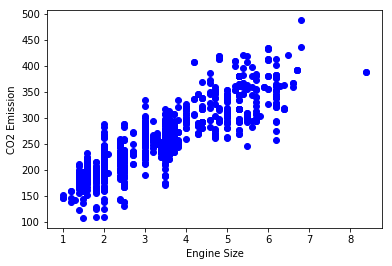

In [2]:
#non-categorical parameter
ncdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

plt.scatter(ncdf.ENGINESIZE, ncdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()

In [3]:
ncdf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

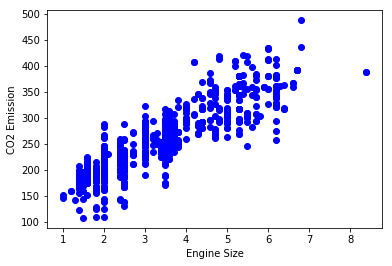

In [4]:
msk = np.random.rand(len(df)) < 0.8
train = ncdf[msk]
test = ncdf[~msk]

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show

In [5]:
#Find Coefficient for selected parameter
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)

print('Coefficients:', regr.coef_)

Coefficients: [[10.95873341  7.21988003  9.78331766]]


# Input for Prediction Score 1

Using: EngineSize, Cylinders and FuelConsumption Combination

In [6]:
y_ = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

rss = np.mean((y_ - y) ** 2)
var = regr.score(x,y)

print("Residual Sum of Squares: %.2f" % rss)
print('variance score         : %.2f' % var)
#Note: near 1 variance score is perfect prediction

Residual Sum of Squares: 592.66
variance score         : 0.84


# Input for Prediction Score 2

Using: EngineSize, Cylinders and FuelConsumption CITY

In [7]:
y2_ = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
x2 = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
y2 = np.asanyarray(test[['CO2EMISSIONS']])

rss2 = np.mean((y2_ - y2) ** 2)
var2 = regr.score(x2,y2)

print("Residual Sum of Squares: %.2f" % rss2)
print('variance score         : %.2f' % var2)

Residual Sum of Squares: 930.01
variance score         : 0.75


# Input for Prediction Score 3

Using: EngineSize, Cylinders and FuelConsumption HWY

In [8]:
y3_ = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY']])
x3 = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY']])
y3 = np.asanyarray(test[['CO2EMISSIONS']])

rss3 = np.mean((y3_ - y3) ** 2)
var3 = regr.score(x3,y3)

print("Residual Sum of Squares: %.2f" % rss3)
print('variance score         : %.2f' % var3)

Residual Sum of Squares: 1082.10
variance score         : 0.71


# Prediction Parameter

In [9]:
new_enginesize = 2
new_cylinders = 4
new_fc_city = 9.9
new_fc_hwy = 6.7
new_fc_comb = 8.5

# Prediction

In [10]:
#Predict using Engine Size, Cylinders and FC Comb parameter
pred_var1 = regr.predict([[new_enginesize,new_cylinders,new_fc_comb]])
print("Predicted CO2 Emission, ES, CY, FCCo: %.2f" % (pred_var1))

#Predict using Engine Size, Cylinders and FC CITY parameter
pred_var2 = regr.predict([[new_enginesize,new_cylinders,new_fc_city]])
print("Predicted CO2 Emission, ES, CY, FCCy: %.2f" % (pred_var2))

#Predict using Engine Size, Cylinders and FC CITY parameter
pred_var3 = regr.predict([[new_enginesize,new_cylinders,new_fc_hwy]])
print("Predicted CO2 Emission, ES, CY, FCHw: %.2f" % (pred_var3))

Predicted CO2 Emission, ES, CY, FCCo: 198.29
Predicted CO2 Emission, ES, CY, FCCy: 211.99
Predicted CO2 Emission, ES, CY, FCHw: 180.68


# Conclusion

In [11]:
print("Using Engine Size     : %.2f" % (new_enginesize))
print("Cylinders Size        : %.2f" % (new_cylinders))
print("Fuel Consumption Comb : %.2f" % (new_fc_comb))
print("Fuel Consumption CITY : %.2f" % (new_fc_city))
print("Fuel Consumption HWY  : %.2f" % (new_fc_hwy))

print("                                               |    RSS    |   Var | CO2 Prediction")
print("-----------------------------------------------------------------------------------------")
print(f"Input:Engine Size,CylindersSize,FuelConsComb   |  {rss:.2f}   | {var:.2f}  | {pred_var1}")
print(f"Input:Engine Size,CylindersSize,FuelConsCITY   |  {rss2:.2f}   | {var2:.2f}  | {pred_var2}")
print(f"Input:Engine Size,CylindersSize,FuelConsHWY    |  {rss3:.2f}  | {var3:.2f}  | {pred_var3}")

Using Engine Size     : 2.00
Cylinders Size        : 4.00
Fuel Consumption Comb : 8.50
Fuel Consumption CITY : 9.90
Fuel Consumption HWY  : 6.70
                                               |    RSS    |   Var | CO2 Prediction
-----------------------------------------------------------------------------------------
Input:Engine Size,CylindersSize,FuelConsComb   |  592.66   | 0.84  | [[198.28916456]]
Input:Engine Size,CylindersSize,FuelConsCITY   |  930.01   | 0.75  | [[211.98580929]]
Input:Engine Size,CylindersSize,FuelConsHWY    |  1082.10  | 0.71  | [[180.67919276]]
